In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL de la page
url = "https://www.institutdesactuaires.com/se-documenter/memoires/memoires-d-actuariat-4651"

# Envoi de la requête HTTP
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Création de l'objet BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Trouver le tableau
table = soup.find('table')

# Listes pour stocker les données
auteurs = []
societes = []
annees = []
titres = []

# Extraction des données du tableau
rows = table.find_all('tr')[1:]  # Skip header row
for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 4:
        auteurs.append(cols[0].text.strip())
        societes.append(cols[1].text.strip())
        annees.append(cols[2].text.strip())
        titres.append(cols[3].text.strip())

# Création d'un DataFrame
df = pd.DataFrame({
    'Auteur': auteurs,
    'Société': societes,
    'Année': annees,
    'Titre': titres
})

# Sauvegarde dans un fichier txt
with open('memoires_actuariat.txt', 'w', encoding='utf-8') as f:
    df.to_string(f, index=False)

print("Les données ont été extraites et sauvegardées dans 'memoires_actuariat.txt'")

Les données ont été extraites et sauvegardées dans 'memoires_actuariat.txt'


# Assistant
Here's a list of useful graphs for text/categorical data, sorted by utility:

1. Bar Plot: Count of publications per `Année` (Year) to show temporal distribution

Text(0.5, 1.0, 'Publications per Year')

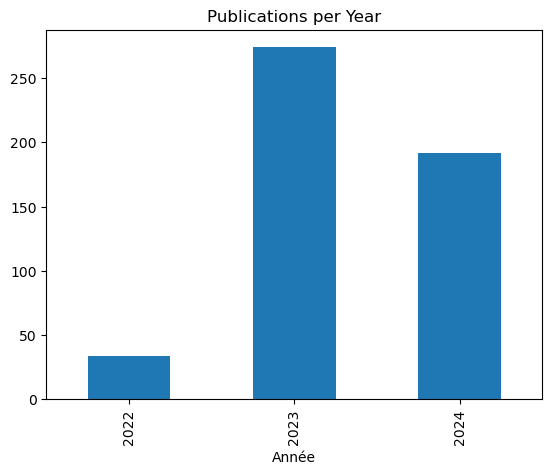

In [18]:

df['Année'].value_counts().sort_index().plot(kind='bar')
plt.title('Publications per Year')


2. Pie Chart: Distribution of publications by `Société` (Publisher/Company)

Text(0.5, 1.0, 'Distribution by Publisher')

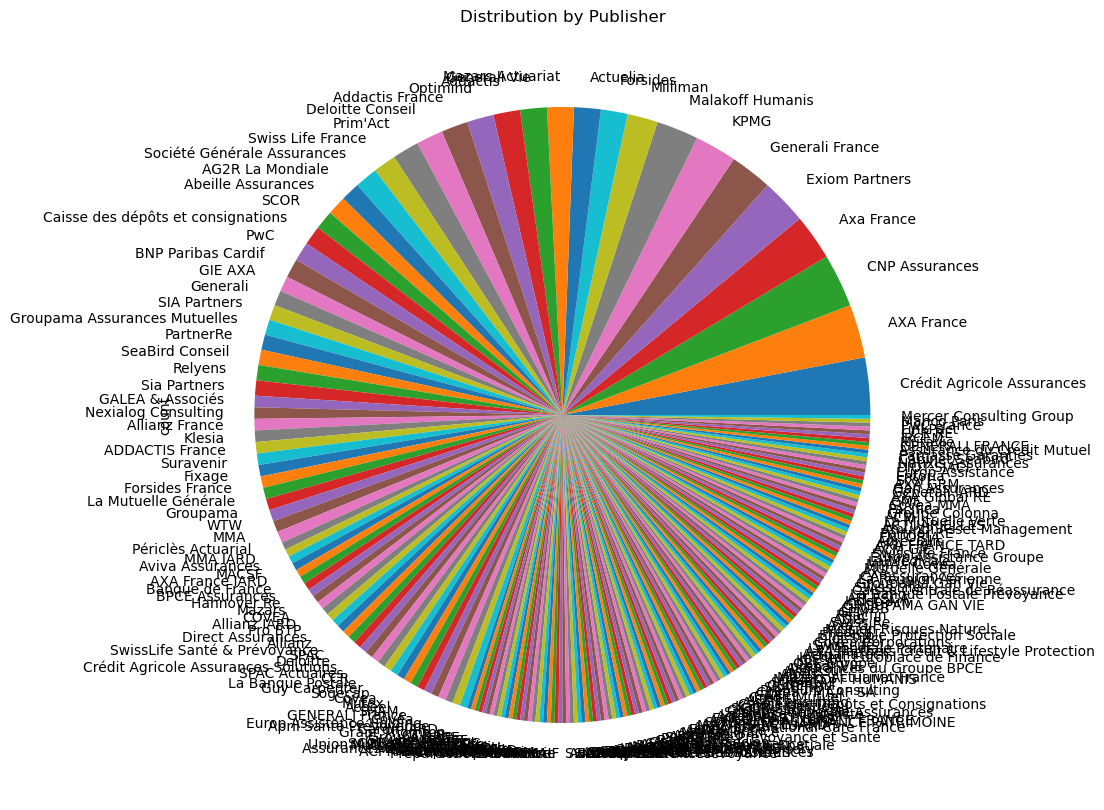

In [37]:
df['Société'].value_counts().plot(kind='pie', figsize=(10,10))
plt.title('Distribution by Publisher')


3. Horizontal Bar Chart: Top 10 most frequent `Auteur`s (Authors)

Text(0.5, 1.0, 'Top 10 Authors')

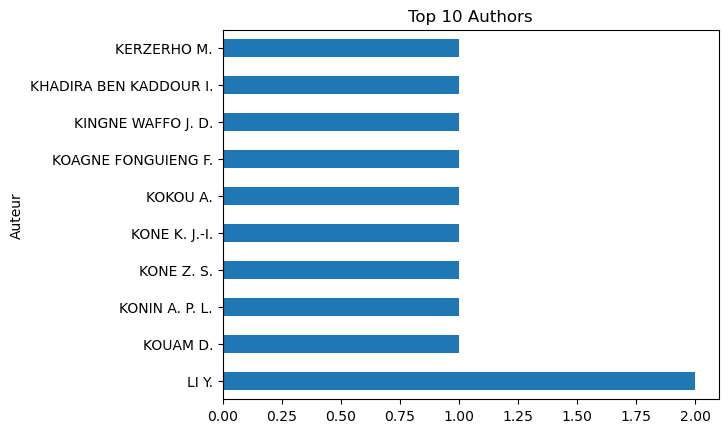

In [22]:
df['Auteur'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Authors')


4. Stacked Bar: Authors vs Years (requires data transformation)

Text(0.5, 1.0, 'Authors Publication Timeline')

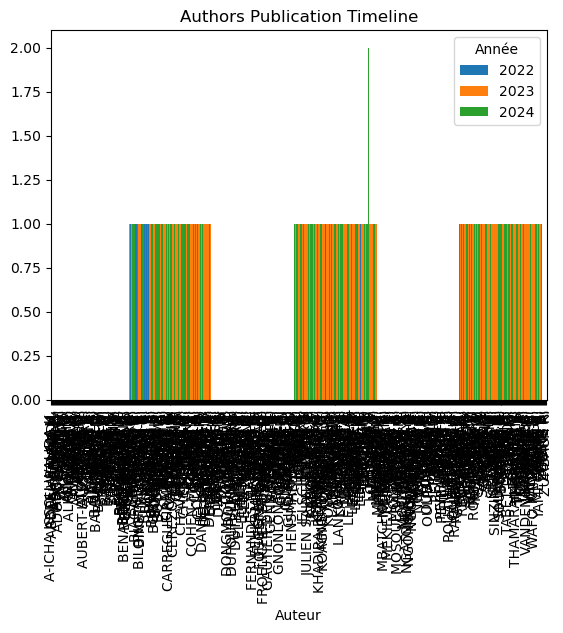

In [24]:
pd.crosstab(df['Auteur'], df['Année']).plot(kind='bar', stacked=True)
plt.title('Authors Publication Timeline')


5. TreeMap (using plotly): Hierarchical view of Société -> Auteur

In [26]:
import plotly.express as px
fig = px.treemap(df, path=['Société', 'Auteur'])
fig.show()